In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
df = pd.read_csv("./Airplane_Crashes_and_Fatalities_Since_1908.csv")
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [76]:
# Keep only the 'Summary' column and the target variable
df = df[['Summary', 'Fatalities']]

# Remove duplicates
df = df.drop_duplicates()

# Handle missing values
df = df.dropna(subset=['Summary', 'Fatalities'])

# Data cleaning and standardization
df['Summary'] = df['Summary'].str.lower()  # Convert to lowercase
df['Summary'] = df['Summary'].str.replace(r'[^\w\s]', '')  # Remove punctuation

# Print the updated DataFrame
print(df.head())

                                             Summary  Fatalities
0  during a demonstration flight, a u.s. army fly...         1.0
1  first u.s. dirigible akron exploded just offsh...         5.0
2  the first fatal airplane accident in canada oc...         1.0
3  the airship flew into a thunderstorm and encou...        14.0
4  hydrogen gas which was being vented was sucked...        30.0


In [77]:
# Tokenize the text and remove stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['plane', 'aircraft', 'flight','crashed','en','route','sea','miles','ft','000','500','200','mt'])  # Add additional words to remove
df['Summary'] = df['Summary'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

# Print the updated DataFrame
print(df.head())

                                             Summary  Fatalities
0  demonstration , u.s. army flyer flown orville ...         1.0
1  first u.s. dirigible akron exploded offshore a...         5.0
2  first fatal airplane accident canada occurred ...         1.0
3  airship flew thunderstorm encountered severe d...        14.0
4  hydrogen gas vented sucked forward engine igni...        30.0


In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
features = vectorizer.fit_transform(df['Summary'])

# Convert the features to a DataFrame
features_df = pd.DataFrame(
    features.toarray(),
    columns=vectorizer.get_feature_names_out(),
    index=df.index
)

# Print the feature matrix
print(features_df)

            00       000  000feet  000ft  000m        01  013  0142  015  \
0     0.000000  0.000000      0.0    0.0   0.0  0.000000  0.0   0.0  0.0   
1     0.000000  0.232587      0.0    0.0   0.0  0.000000  0.0   0.0  0.0   
2     0.000000  0.000000      0.0    0.0   0.0  0.000000  0.0   0.0  0.0   
3     0.000000  0.000000      0.0    0.0   0.0  0.000000  0.0   0.0  0.0   
4     0.000000  0.179465      0.0    0.0   0.0  0.000000  0.0   0.0  0.0   
...        ...       ...      ...    ...   ...       ...  ...   ...  ...   
5263  0.000000  0.000000      0.0    0.0   0.0  0.000000  0.0   0.0  0.0   
5264  0.000000  0.000000      0.0    0.0   0.0  0.000000  0.0   0.0  0.0   
5265  0.116757  0.000000      0.0    0.0   0.0  0.253508  0.0   0.0  0.0   
5266  0.000000  0.000000      0.0    0.0   0.0  0.000000  0.0   0.0  0.0   
5267  0.000000  0.000000      0.0    0.0   0.0  0.000000  0.0   0.0  0.0   

      0173  ...  zimbabwe   zk  zlaté  zone  zones  zue  zulia  zuma  zurich  \
0      

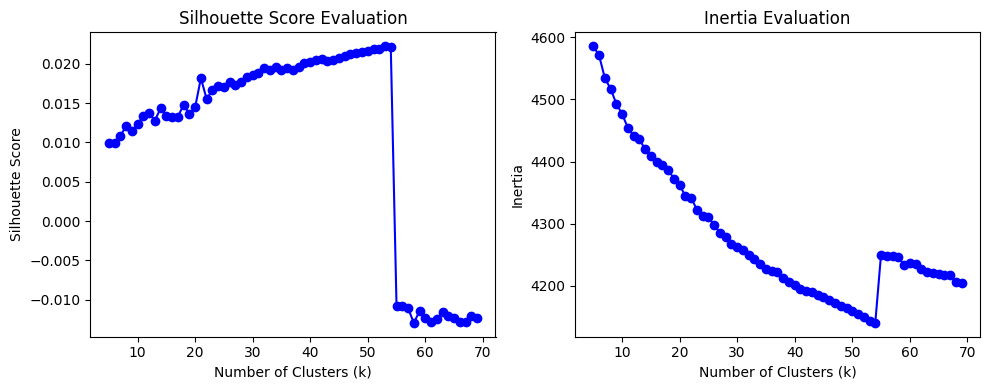

In [94]:
# Define a range of k values to evaluate
k_values = range(5, 70)  # Adjust the range as desired

# Initialize lists to store the evaluation scores
silhouette_scores = []
inertia_scores = []

# Perform clustering and evaluate for each k value
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    labels = kmeans.labels_
    
    # Calculate silhouette score
    silhouette = silhouette_score(features, labels)
    silhouette_scores.append(silhouette)
    
    # Calculate inertia (within-cluster sum of squares)
    inertia_scores.append(kmeans.inertia_)

# Plot the evaluation scores
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Evaluation')

plt.subplot(1, 2, 2)
plt.plot(k_values, inertia_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia Evaluation')

plt.tight_layout()
plt.show()

Label: taking, land, attempting, shortly, pilot, Count: 2093
Label: approach, pilot, terrain, altitude, error, Count: 653
Label: control, loss, wing, failure, lost, Count: 552
Label: engine, failure, fire, takeoff, emergency, Count: 432
Label: runway, short, landing, approach, overran, Count: 424
Label: weather, conditions, vfr, adverse, poor, Count: 204
Label: mountain, struck, flew, cargo, poor, Count: 153
Label: shot, rebels, missile, to, surface, Count: 124
Label: cargo, attempting, approach, land, struck, Count: 124
Label: takeoff, shortly, engine, failure, cargo, Count: 67


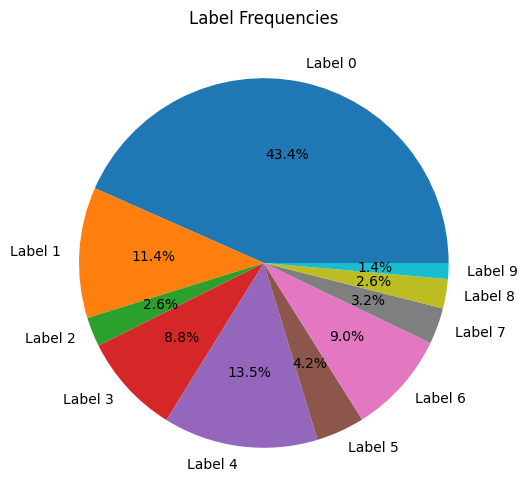

                                                Summary  Fatalities  Cluster  \
0     demonstration , u.s. army flyer flown orville ...         1.0        3   
1     first u.s. dirigible akron exploded offshore a...         5.0        3   
2     first fatal airplane accident canada occurred ...         1.0        3   
3     airship flew thunderstorm encountered severe d...        14.0        4   
4     hydrogen gas vented sucked forward engine igni...        30.0        3   
...                                                 ...         ...      ...   
5263  approach , military transport 4 houses , skidd...        98.0        3   
5264              cargo approach isiro-matari airport .         4.0        6   
5265  airbus went missing atlantiocean paris , franc...       228.0        3   
5266  air ambulance hills attempting land heavy fog ...         1.0        3   
5267  military transport went missing might due heav...        13.0        3   

                                       

In [97]:
# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

stop_words = set(stopwords.words('english'))
stop_words.update(['feet','ft','plane', 'aircraft', 'flight','crashed','en','route','sea'])  # Add additional words to remove
stop_words.update(['000','55','miles','ft','000','500','200','mt','rio','de','janeiro'])
df['Summary'] = df['Summary'].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words]))

# Fit and transform the data
features = vectorizer.fit_transform(df['Summary'])

# Perform clustering with K-means
k = 10  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)

# Get the feature names
terms = vectorizer.get_feature_names_out()

# Analyze cluster characteristics
cluster_keywords = []
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
for i in range(k):
    top_keywords = [terms[ind] for ind in order_centroids[i, :5]]  # Select top 3 words
    cluster_keywords.append(top_keywords)

# Assign labels to clusters based on keywords
cluster_labels = [', '.join(keywords) for keywords in cluster_keywords]

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_
df['Label'] = [cluster_labels[label] for label in kmeans.labels_]

# Print the resulting clusters with labels
#print(df)


from collections import Counter

# Print the resulting cluster labels
#for label in kmeans.labels_:
#    print(cluster_labels[label])

# Extract all the labels
all_labels = [cluster_labels[label] for label in kmeans.labels_]

# Count the occurrences of each label
label_counts = Counter(all_labels)

# Print the most common labels and their frequencies
most_common_labels = label_counts.most_common()
for label, count in most_common_labels:
    print(f"Label: {label}, Count: {count}")

# Count the occurrences of each label
label_counts = Counter(all_labels)

# Get the labels and their frequencies
labels = [f"Label {i}" for i in range(k)]
#labels = ["Shot","pilot error", "engine failure on takeoff","short runway approach", "fog", "poor weather conditions", "cargo-related landing", "collision midair", "struck","severe turbulence","engine failure","engine burst into flames","crashed into mountains", "never found/dissapeared","overloaded plane" ]
frequencies = list(label_counts.values())

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(frequencies, labels=labels, autopct='%1.1f%%')
plt.title('Label Frequencies')

# Display the chart
plt.show()
print(df)
# Concatenate all the labels into a single string
#label_text = ' '.join(all_labels)

# Tokenize the label text
#tokens = label_text.split()

# Count the occurrences of each word
#word_counts = Counter(tokens)

# Print the most common words and their frequencies
#most_common_words = word_counts.most_common()
#for word, count in most_common_words:
#    print(f"Word: {word}, Count: {count}")

Number of topics:  10
LDA Coherence Score: 0.36844535742055023
NMF Coherence Score: 0.5005072925867714
Number of topics:  11
LDA Coherence Score: 0.38240797492603124
NMF Coherence Score: 0.507661761223286
Number of topics:  12
LDA Coherence Score: 0.38604845925147196
NMF Coherence Score: 0.48716330553364123
Number of topics:  13
LDA Coherence Score: 0.38772581306839177
NMF Coherence Score: 0.479330298647544
Number of topics:  14
LDA Coherence Score: 0.3750268279191219
NMF Coherence Score: 0.47023346478734046
Number of topics:  15
LDA Coherence Score: 0.37450422624755614
NMF Coherence Score: 0.46523585247142923
Number of topics:  16
LDA Coherence Score: 0.3972679934070682
NMF Coherence Score: 0.45308380305993873
Number of topics:  17
LDA Coherence Score: 0.40019838187199525
NMF Coherence Score: 0.47146107177686775
Number of topics:  18
LDA Coherence Score: 0.3962965548746063
NMF Coherence Score: 0.4628309068644264
Number of topics:  19
LDA Coherence Score: 0.4023658489872662
NMF Coheren

/Users/zlatastefanovic/myenv/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Number of topics:  24
LDA Coherence Score: 0.3992794029750777
NMF Coherence Score: 0.4555907827006198
Number of topics:  25
LDA Coherence Score: 0.4118590383131546
NMF Coherence Score: 0.44353855925165236
Number of topics:  26
LDA Coherence Score: 0.3967262858903927
NMF Coherence Score: 0.44525045565880694
Number of topics:  27
LDA Coherence Score: 0.38222778541111363
NMF Coherence Score: 0.4474587558335388
Number of topics:  28
LDA Coherence Score: 0.39616421284493103
NMF Coherence Score: 0.4193711774763035
Number of topics:  29
LDA Coherence Score: 0.43729658591923537
NMF Coherence Score: 0.43188603435574907
Number of topics:  30
LDA Coherence Score: 0.37794101174000533
NMF Coherence Score: 0.42913443417560043
Number of topics:  31
LDA Coherence Score: 0.3988833604830169
NMF Coherence Score: 0.44246318703827403
Number of topics:  32
LDA Coherence Score: 0.4044200880202038
NMF Coherence Score: 0.4245169117739364
Number of topics:  33
LDA Coherence Score: 0.4052789622668226
NMF Coheren

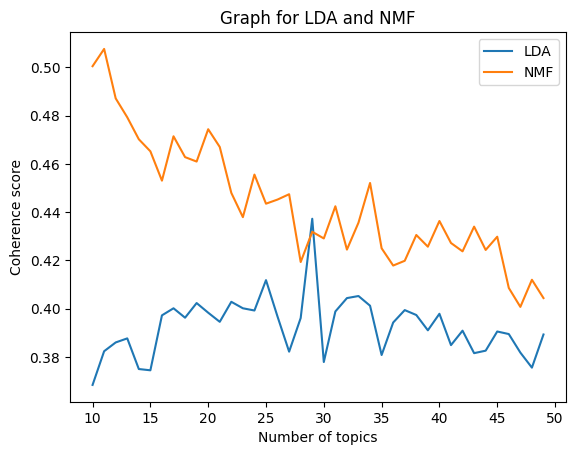

In [122]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from gensim.models import CoherenceModel
from gensim import corpora
from gensim.models import LdaModel, Nmf


# Extract the text data (summaries)
summaries = df['Summary']

lda_coherence_scores = []
nmf_coherence_scores = []
# Initialize the TF-IDF vectorizer
additional_words = ['plane', 'aircraft', 'flight','crashed','en','route','sea','miles','ft','000','500','200','mt','cargo','later','bogota','afghan']  # Add additional words to remove

all_stop_words = list(ENGLISH_STOP_WORDS)+additional_words
vectorizer = TfidfVectorizer(stop_words=all_stop_words)

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(summaries)
n = 50
# Define the number of topics
for num_topics in range(10,n):

    # Perform LDA
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(tfidf_matrix)

    # Perform NMF
    nmf = NMF(n_components=num_topics, random_state=42)
    nmf.fit(tfidf_matrix)

    # Get the top words for each topic
    def get_top_words(model, feature_names, n_top_words):
        top_words = []
        for topic_idx, topic in enumerate(model.components_):
            topic_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
            top_words.append(topic_words)
        return top_words

    # Get the feature names from the TF-IDF vectorizer
    feature_names = vectorizer.get_feature_names_out()

    # Get the top words for each topic in LDA
    lda_top_words = get_top_words(lda, feature_names, n_top_words=5)

    # Get the top words for each topic in NMF
    nmf_top_words = get_top_words(nmf, feature_names, n_top_words=5)
    print("Number of topics: ",num_topics)
    # Print the top words for each topic
    #for topic_idx in range(num_topics):
        #print(f"Topic {topic_idx + 1} (LDA):", ", ".join(lda_top_words[topic_idx]))
        #print()

    #for topic_idx in range(num_topics):
     #   print(f"Topic {topic_idx + 1} (NMF):", ", ".join(nmf_top_words[topic_idx]))
      #  print()

    # Convert the summaries to a list of tokenized sentences
    tokenized_summaries = [summary.split() for summary in summaries]

    # Create a dictionary from the tokenized summaries
    dictionary = corpora.Dictionary(tokenized_summaries)

    # Create a bag-of-words corpus
    corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_summaries]

    # Calculate topic coherence using c_v metric for LDA
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
    lda_coherence_model = CoherenceModel(model=lda_model, texts=tokenized_summaries, dictionary=dictionary, coherence='c_v')
    lda_coherence = lda_coherence_model.get_coherence()

    # Calculate topic coherence using c_v metric for NMF
    nmf_model = Nmf(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
    nmf_coherence_model = CoherenceModel(model=nmf_model, texts=tokenized_summaries, dictionary=dictionary, coherence='c_v')
    nmf_coherence = nmf_coherence_model.get_coherence()

    # Print the topic coherence scores
    print("LDA Coherence Score:", lda_coherence)
    lda_coherence_scores.append(lda_coherence)
    print("NMF Coherence Score:", nmf_coherence)
    nmf_coherence_scores.append(nmf_coherence)

plt.plot([i for i in range(10,n)], lda_coherence_scores, label='LDA')
plt.plot([i for i in range(10,n)], nmf_coherence_scores, label='NMF')

# Adding labels and title
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.title('Graph for LDA and NMF')

# Adding a legend
plt.legend()

# Displaying the graph
plt.show()


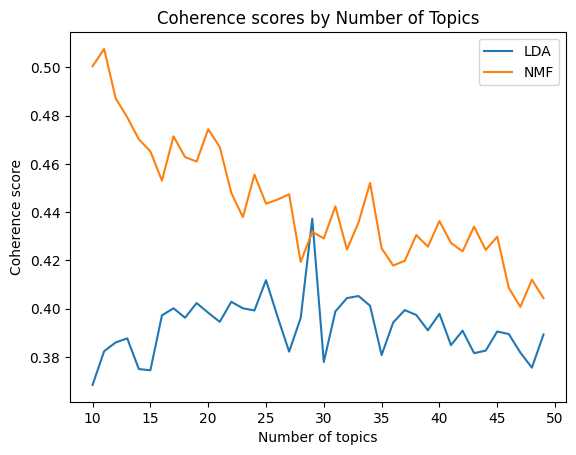

In [124]:
topics = [i for i in range(10,50)]
plt.plot(topics, lda_coherence_scores, label='LDA')
plt.plot(topics, nmf_coherence_scores, label='NMF')
sum = [nmf_coherence_scores[i]+lda_coherence_scores[i] for i in range(0,15)]
#plt.plot(topics,sum, label = 'SUM')

# Adding labels and title
plt.xlabel('Number of topics')
plt.ylabel('Coherence score')
plt.title('Coherence scores by Number of Topics')

# Adding a legend
plt.legend()

# Displaying the graph
plt.show()
##LDA works best for 11 different topics
##NMF works best for 29 different topics

In [129]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from gensim.models import CoherenceModel
from gensim import corpora
from gensim.models import LdaModel, Nmf


# Extract the text data (summaries)
summaries = df['Summary']

lda_coherence_scores = []
nmf_coherence_scores = []
# Initialize the TF-IDF vectorizer
additional_words = ['plane', 'aircraft', 'flight','francisco','mediterranean','crashed','en','route','sea','miles','ft','000','500','200','mt','cargo','later','bogota','afghan']  # Add additional words to remove

all_stop_words = list(ENGLISH_STOP_WORDS)+additional_words
vectorizer = TfidfVectorizer(stop_words=all_stop_words)


num_topics = 29
# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(summaries)
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(tfidf_matrix)

# Perform NMF
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(tfidf_matrix)

# Get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words.append(topic_words)
    return top_words

# Get the feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the top words for each topic in LDA
lda_top_words = get_top_words(lda, feature_names, n_top_words=5)

    # Get the top words for each topic in NMF
#nmf_top_words = get_top_words(nmf, feature_names, n_top_words=5)
print("Number of topics: ",num_topics)
    #Print the top words for each topic
for topic_idx in range(num_topics):
    print(f"Topic {topic_idx + 1} (LDA):", ", ".join(lda_top_words[topic_idx]))
    print()

#for topic_idx in range(num_topics):
#    print(f"Topic {topic_idx + 1} (NMF):", ", ".join(nmf_top_words[topic_idx]))
#    print()

    # Convert the summaries to a list of tokenized sentences
tokenized_summaries = [summary.split() for summary in summaries]

    # Create a dictionary from the tokenized summaries
dictionary = corpora.Dictionary(tokenized_summaries)
# Convert the summaries to a list of tokenized sentences
tokenized_summaries = [summary.split() for summary in summaries]

    # Create a dictionary from the tokenized summaries
dictionary = corpora.Dictionary(tokenized_summaries)

    # Create a bag-of-words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_summaries]

    # Calculate topic coherence using c_v metric for LDA
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
lda_coherence_model = CoherenceModel(model=lda_model, texts=tokenized_summaries, dictionary=dictionary, coherence='c_v')
lda_coherence = lda_coherence_model.get_coherence()

    # Calculate topic coherence using c_v metric for NMF
#nmf_model = Nmf(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
#nmf_coherence_model = CoherenceModel(model=nmf_model, texts=tokenized_summaries, dictionary=dictionary, coherence='c_v')
#nmf_coherence = nmf_coherence_model.get_coherence()

    # Print the topic coherence scores
print("LDA Coherence Score:", lda_coherence)
#print("NMF Coherence Score:", nmf_coherence)


Number of topics:  29
Topic 1 (LDA): disappeared, cause, undetermined, unknown, reasons

Topic 2 (LDA): attempting, land, short, runway, stalled

Topic 3 (LDA): separated, touch, landings, practicing, spiraled

Topic 4 (LDA): fuselage, crack, inflight, separation, wing

Topic 5 (LDA): shortly, taking, experiencing, engine, disorientation

Topic 6 (LDA): storm, premature, rainstorm, mda, undershot

Topic 7 (LDA): caught, mechanical, downdrafts, beach, blown

Topic 8 (LDA): fuel, ran, evasive, flamed, aboard

Topic 9 (LDA): typhoon, impairment, 30, minutes, rugged

Topic 10 (LDA): shot, air, rebels, missile, surface

Topic 11 (LDA): takeoff, shifted, limits, mail, hour

Topic 12 (LDA): approach, midair, aboard, exploded, collision

Topic 13 (LDA): cabin, passenger, detonation, device, warning

Topic 14 (LDA): mountain, weather, conditions, poor, flew

Topic 15 (LDA): engine, landing, failure, takeoff, lost

Topic 16 (LDA): hillside, running, pattern, holding, fuel

Topic 17 (LDA): disapp

In [128]:
nmf_coherence_scores = []
additional_words = ['plane', 'aircraft', 'flight','crashed','en','route','sea','miles','ft','000','500','200','mt','cargo','later','bogota','afghan']  # Add additional words to remove

all_stop_words = list(ENGLISH_STOP_WORDS)+additional_words
vectorizer = TfidfVectorizer(stop_words=all_stop_words)


num_topics = 11
# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(summaries)
# Perform NMF
nmf = NMF(n_components=num_topics, random_state=42)
nmf.fit(tfidf_matrix)

# Get the top words for each topic
def get_top_words(model, feature_names, n_top_words):
    top_words = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        top_words.append(topic_words)
    return top_words

# Get the feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get the top words for each topic in NMF
nmf_top_words = get_top_words(nmf, feature_names, n_top_words=5)

print("Number of topics: ",num_topics)
    #Print the top words for each topic
for topic_idx in range(num_topics):
    print(f"Topic {topic_idx + 1} (NMF):", ", ".join(nmf_top_words[topic_idx]))
    print()

    # Convert the summaries to a list of tokenized sentences
tokenized_summaries = [summary.split() for summary in summaries]

    # Create a dictionary from the tokenized summaries
dictionary = corpora.Dictionary(tokenized_summaries)
# Convert the summaries to a list of tokenized sentences
tokenized_summaries = [summary.split() for summary in summaries]

    # Create a dictionary from the tokenized summaries
dictionary = corpora.Dictionary(tokenized_summaries)

    # Create a bag-of-words corpus
corpus = [dictionary.doc2bow(tokens) for tokens in tokenized_summaries]
  # Calculate topic coherence using c_v metric for NMF
nmf_model = Nmf(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)
nmf_coherence_model = CoherenceModel(model=nmf_model, texts=tokenized_summaries, dictionary=dictionary, coherence='c_v')
nmf_coherence = nmf_coherence_model.get_coherence()

# Print the topic coherence scores
print("NMF Coherence Score:", nmf_coherence)


Number of topics:  11
Topic 1 (NMF): engine, failure, lost, experiencing, right

Topic 2 (NMF): mountain, flew, struck, fog, hit

Topic 3 (NMF): takeoff, shortly, aborted, stalled, overloaded

Topic 4 (NMF): conditions, vfr, adverse, weather, continued

Topic 5 (NMF): approach, final, crew, pilot, descent

Topic 6 (NMF): attempting, land, fog, burned, airport

Topic 7 (NMF): taking, shortly, minutes, airport, lost

Topic 8 (NMF): runway, short, overran, fog, hit

Topic 9 (NMF): poor, weather, conditions, visibility, conditons

Topic 10 (NMF): landing, emergency, attempt, make, gear

Topic 11 (NMF): struck, ground, high, trees, wing

NMF Coherence Score: 0.507661761223286


In [108]:
from sklearn.metrics.pairwise import cosine_similarity
from itertools import combinations
import numpy as np

# Calculate topic coherence using c_v metric
def calculate_topic_coherence(top_words):
    coherence_scores = []
    for word_list in top_words:
        pairs = list(combinations(word_list, 2))
        pairwise_similarity = []
        for pair in pairs:
            # Calculate cosine similarity between word vectors
            pair_similarity = cosine_similarity(tfidf_matrix[:, vectorizer.vocabulary_[pair[0]]],
                                                tfidf_matrix[:, vectorizer.vocabulary_[pair[1]]])
            pairwise_similarity.append(pair_similarity[0][0])
        coherence_score = np.mean(pairwise_similarity)
        coherence_scores.append(coherence_score)
    return coherence_scores

# Calculate coherence scores for LDA
lda_coherence_scores = calculate_topic_coherence(lda_top_words)

# Calculate coherence scores for NMF
nmf_coherence_scores = calculate_topic_coherence(nmf_top_words)

# Print the coherence scores for each topic in LDA
for topic_idx, coherence_score in enumerate(lda_coherence_scores):
    print(f"Topic {topic_idx + 1} (LDA) coherence score:", coherence_score)
    print()

# Print the coherence scores for each topic in NMF
for topic_idx, coherence_score in enumerate(nmf_coherence_scores):
    print(f"Topic {topic_idx + 1} (NMF) coherence score:", coherence_score)
    print()

Topic 1 (LDA) coherence score: 0.0

Topic 2 (LDA) coherence score: 0.0

Topic 3 (LDA) coherence score: 0.0

Topic 4 (LDA) coherence score: 0.0

Topic 5 (LDA) coherence score: 0.0

Topic 1 (NMF) coherence score: 0.0

Topic 2 (NMF) coherence score: 0.0

Topic 3 (NMF) coherence score: 0.0

Topic 4 (NMF) coherence score: 0.0

Topic 5 (NMF) coherence score: 0.0



In [64]:
from gensim.models import CoherenceModel

# Assuming you have already performed LDA and obtained the lda model and tfidf_matrix

import gensim

# Convert the sparse tfidf_matrix to a dense array
tfidf_array = tfidf_matrix.toarray()

# Create a dictionary mapping the feature indices to the actual words
id2word = {i: word for i, word in enumerate(vectorizer.get_feature_names_out())}

# Convert the dense array to a list of lists (required by gensim)
corpus = [list(row) for row in tfidf_array]

# Create the gensim corpus
gensim_corpus = [list(zip(range(len(row)), row)) for row in corpus]

# Create the gensim LDA model
gensim_lda_model = gensim.models.LdaModel(corpus=gensim_corpus, id2word=id2word, num_topics=num_topics, random_state=42)

# Calculate the coherence score
coherence_model = CoherenceModel(model=gensim_lda_model, texts=summaries, corpus=gensim_corpus, coherence='c_v')
coherence_score = coherence_model.get_coherence()

# Print the coherence score
print("Coherence Score:", coherence_score)

NameError: name 'corpora' is not defined